# Install Packages and import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=9bddab9277baa3790020a3b8ef186fba71d64d168d3540f574a4466f7a6a0de4
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [3]:
# for data manipulation
import pandas as pd
import numpy as np
import os
import pickle

# for scoring
#from collections import Counter

# for statistical analysis
import pingouin as pg
from scipy.stats import shapiro, levene, permutation_test
from statsmodels.stats.multitest import multipletests

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the dataset for the the analysis

In [4]:
# Load data ser
b = pd.read_csv('/content/testing.csv', encoding = "UTF-8", sep = ";")

In [5]:
b.head()

,ID,type,pred,true,split
0,1,A,F,F,split_1
1,1,E,T,T,split_1
2,1,G,T,T,split_1
3,1,M,F,F,split_1
4,1,C,T,T,split_1


In [7]:
# Load datasets with linguistic features:
PATH = '/content/drive/MyDrive/ColabNotebooks/Cog_Behav_Social_Data/Opinion_lingfeat.csv'
#df1 = pd.read_csv('/content/Opinion_lingfeat.csv', encoding = "UTF-8", sep = ";")
df1 = pd.read_csv(PATH, encoding = "UTF-8", sep = ";")
#df2 = pd.read_csv('/content/Memory_lingfeat.csv', encoding = "UTF-8")
#df3 = pd.read_csv('/content/Intentions_lingfeat.csv', encoding = "UTF-8")

# Add empty columns

#df1['pred'] = np.nan
#df1['true'] = np.nan
#df1['split'] = np.nan
df1.drop('labels', axis=1, inplace=True)


Visualize the modified datasets:

In [8]:
df1.head()

,ID,type,word_counts,num_sentences,num_syllables,avg_syllables_per_word,fk_grade,fk_read,Analytic,Authentic,...,Self-reference,Other-reference,Contextual Embedding,Perceptual Details,Reality Monitoring,concr_score,Temporal details,Spatial details,People,Quantity details
0,1,A,19,3,24,1.263158,2.2,90.46,22.98,1.00,...,0.00,10.53,5.26,0.00,0.00,3.726250,0.0,0.0,0.0,0.000000
1,1,E,36,3,66,1.941176,11.2,34.63,41.36,22.12,...,11.11,0.00,0.00,0.00,-16.66,2.709286,0.0,0.0,0.0,0.000000
2,1,G,61,3,73,1.303571,7.0,77.87,13.44,37.69,...,3.28,3.28,3.28,0.00,-9.83,2.550000,0.0,0.0,0.0,0.000000
3,1,M,34,3,42,1.272727,4.0,85.69,29.85,4.60,...,8.82,17.65,8.82,0.00,11.76,3.163333,0.0,0.0,0.0,0.000000
4,1,C,53,3,73,1.431373,7.6,71.14,48.72,18.63,...,3.77,1.89,5.66,1.89,-5.66,3.071250,0.0,0.0,0.0,1.886792


In [9]:
df1 = pd.merge(df1, b, on=['ID', 'type'], how='inner')
df1.drop('type', axis=1, inplace=True)

In [10]:
df1.head()

,ID,word_counts,num_sentences,num_syllables,avg_syllables_per_word,fk_grade,fk_read,Analytic,Authentic,Tone,...,Perceptual Details,Reality Monitoring,concr_score,Temporal details,Spatial details,People,Quantity details,pred,true,split
0,1,19,3,24,1.263158,2.2,90.46,22.98,1.00,1.00,...,0.00,0.00,3.726250,0.0,0.0,0.0,0.000000,F,F,split_1
1,1,36,3,66,1.941176,11.2,34.63,41.36,22.12,20.23,...,0.00,-16.66,2.709286,0.0,0.0,0.0,0.000000,T,T,split_1
2,1,61,3,73,1.303571,7.0,77.87,13.44,37.69,89.90,...,0.00,-9.83,2.550000,0.0,0.0,0.0,0.000000,T,T,split_1
3,1,34,3,42,1.272727,4.0,85.69,29.85,4.60,66.58,...,0.00,11.76,3.163333,0.0,0.0,0.0,0.000000,F,F,split_1
4,1,53,3,73,1.431373,7.6,71.14,48.72,18.63,49.04,...,1.89,-5.66,3.071250,0.0,0.0,0.0,1.886792,T,T,split_1


In [11]:
df1.isna().sum()

ID                        0
word_counts               0
num_sentences             0
num_syllables             0
avg_syllables_per_word    0
fk_grade                  0
fk_read                   0
Analytic                  0
Authentic                 0
Tone                      0
tone_pos                  0
tone_neg                  0
focuspast                 0
focuspresent              0
focusfuture               0
Cognition                 0
memory                    0
Self-reference            0
Other-reference           0
Contextual Embedding      0
Perceptual Details        0
Reality Monitoring        0
concr_score               0
Temporal details          0
Spatial details           0
People                    0
Quantity details          0
pred                      0
true                      0
split                     0
dtype: int64

# Data Analysis

In [12]:
# Concatenate the three datasets

#scoring_df = pd.concat([df1], axis=0)
scoring_df = df1
scoring_df.head()

,ID,word_counts,num_sentences,num_syllables,avg_syllables_per_word,fk_grade,fk_read,Analytic,Authentic,Tone,...,Perceptual Details,Reality Monitoring,concr_score,Temporal details,Spatial details,People,Quantity details,pred,true,split
0,1,19,3,24,1.263158,2.2,90.46,22.98,1.00,1.00,...,0.00,0.00,3.726250,0.0,0.0,0.0,0.000000,F,F,split_1
1,1,36,3,66,1.941176,11.2,34.63,41.36,22.12,20.23,...,0.00,-16.66,2.709286,0.0,0.0,0.0,0.000000,T,T,split_1
2,1,61,3,73,1.303571,7.0,77.87,13.44,37.69,89.90,...,0.00,-9.83,2.550000,0.0,0.0,0.0,0.000000,T,T,split_1
3,1,34,3,42,1.272727,4.0,85.69,29.85,4.60,66.58,...,0.00,11.76,3.163333,0.0,0.0,0.0,0.000000,F,F,split_1
4,1,53,3,73,1.431373,7.6,71.14,48.72,18.63,49.04,...,1.89,-5.66,3.071250,0.0,0.0,0.0,1.886792,T,T,split_1


In [13]:
list(scoring_df.columns)

['ID',
 'word_counts',
 'num_sentences',
 'num_syllables',
 'avg_syllables_per_word',
 'fk_grade',
 'fk_read',
 'Analytic',
 'Authentic',
 'Tone',
 'tone_pos',
 'tone_neg',
 'focuspast',
 'focuspresent',
 'focusfuture',
 'Cognition',
 'memory',
 'Self-reference',
 'Other-reference',
 'Contextual Embedding',
 'Perceptual Details',
 'Reality Monitoring',
 'concr_score',
 'Temporal details',
 'Spatial details',
 'People',
 'Quantity details',
 'pred',
 'true',
 'split']

In [14]:
scoring_df.shape

(2500, 30)

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Number of unique splits
len_splits = len(scoring_df['split'].unique())

# Initialize a 3D numpy array to hold all confusion matrices
all_conf_matrices = np.zeros((len_splits, 2, 2))

# Accumulate confusion matrices for each split
for i, split in enumerate(scoring_df['split'].unique()):
    actual_split = scoring_df[scoring_df['split'] == split]['true'].values
    predicted_split = scoring_df[scoring_df['split'] == split]['pred'].values
    all_conf_matrices[i] = confusion_matrix(actual_split, predicted_split)

# Compute the average and standard deviation of the confusion matrices
average_confusion_matrix = all_conf_matrices.mean(axis=0)
std_deviation_confusion_matrix = all_conf_matrices.std(axis=0)

print("Average Confusion Matrix:")
print(average_confusion_matrix)
print("\nStandard Deviation Confusion Matrix:")
print(np.round(std_deviation_confusion_matrix,2))

Average Confusion Matrix:
[[273.5   39.  ]
 [ 44.75 267.75]]

Standard Deviation Confusion Matrix:
[[ 2.6   4.95]
 [10.5   6.98]]


In [16]:
all_conf_matrices

array([[[272.,  42.],
        [ 32., 279.]],

       [[272.,  45.],
        [ 41., 267.]],

       [[272.,  32.],
        [ 61., 260.]],

       [[278.,  37.],
        [ 45., 265.]]])

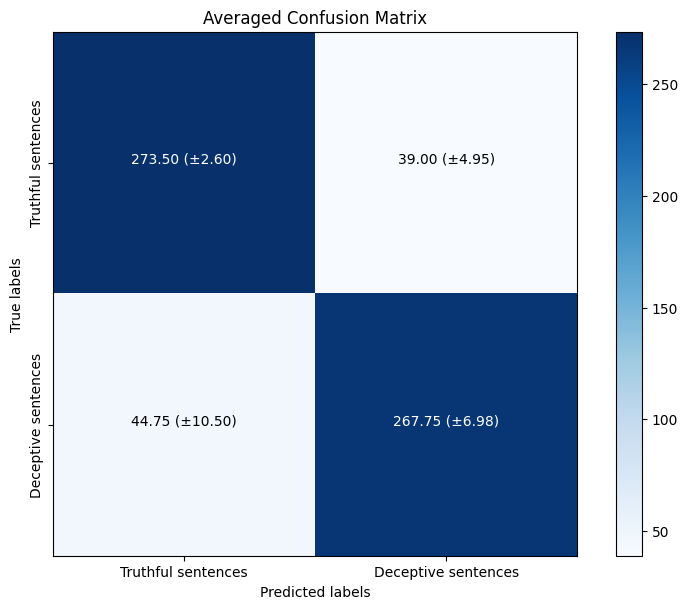

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(8, 6))
plt.imshow(average_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Averaged Confusion Matrix')
plt.colorbar()

# Add tick marks
classes = ['Truthful sentences', 'Deceptive sentences']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes, rotation=90, va='center')

# Displaying the average and standard deviation values in the cells
thresh = average_confusion_matrix.max() / 2.
for i in range(average_confusion_matrix.shape[0]):
    for j in range(average_confusion_matrix.shape[1]):
        cell_text = "{} (±{})".format(
            format(average_confusion_matrix[i, j], '.2f'),
            format(std_deviation_confusion_matrix[i, j], '.2f'))
        plt.text(j, i, cell_text, horizontalalignment="center",
                 color="white" if average_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

##ANALYSIS FOR CORRECTED AND MISCLASSIFIED STATEMENTS

In [18]:
# Compare 'label' and 'predicted_label' columns:
# True values means that 'label' and 'predicted_label' match, and False otherwise.
correct_class = scoring_df['true'] == scoring_df['pred']
print(np.unique(correct_class))

# Filter the DataFrame to keep only the rows where the label and predicted_label match (True in 'correct_class') and do not match (False in 'correct_class').
scoring_df_corrclass = scoring_df[correct_class] # correctly classified instances
scoring_df_misclass = scoring_df[~correct_class] # misclassified instances

[False  True]


In [19]:
import numpy as np
import pingouin as pg
from statsmodels.stats.multitest import multipletests

# Given functions
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

def bootstrap_cles_ci(x, y, alpha=0.05, n_boot=1000):
    boot_cles = []
    for _ in range(n_boot):
        sample_x = np.random.choice(x, size=len(x), replace=True)
        sample_y = np.random.choice(y, size=len(y), replace=True)
        cles = pg.compute_effsize(sample_x, sample_y, eftype='CLES')
        boot_cles.append(cles)
    lower = np.percentile(boot_cles, 100 * (alpha / 2))
    upper = np.percentile(boot_cles, 100 * (1 - alpha / 2))
    return (round((lower), 2), round((upper), 2))

def cohen_d_and_ci(x, y, confidence=0.95):
    d = pg.compute_effsize(x, y, paired=False, eftype='cohen')
    ci_low, ci_high = pg.compute_esci(stat=d, nx=len(x), ny=len(y), paired=False, eftype='cohen', confidence=confidence)
    return d, (ci_low, ci_high)

###MISCLASSIFIED

In [20]:
splits = scoring_df_corrclass['split'].unique()

for split in splits:

    # Split misclassified  instances in true and false df
    scoring_df_mis_h = scoring_df_misclass[(scoring_df_misclass['true'] == 'T') & (scoring_df_misclass['split'] == split)]
    scoring_df_mis_d = scoring_df_misclass[(scoring_df_misclass['true'] == 'F') & (scoring_df_misclass['split'] == split)]

    scoring_df_misclass_h = scoring_df_mis_h.reset_index().drop(['true','pred','split','ID','index'], axis = 1)
    scoring_df_misclass_d = scoring_df_mis_d.reset_index().drop(['true','pred','split','ID','index'], axis = 1)

    # Initializing lists
    stats = []
    p_values = []
    cles_scores = []
    cles_cis = []  # For CLES CI
    cohens_d_scores = []  # For Cohen's d effect size
    cohens_d_cis = []  # For Cohen's d CI
    columns = scoring_df_misclass_h.columns

    for col in columns:
        # Stats and p-value computation
        res = permutation_test((scoring_df_misclass_h[col], scoring_df_misclass_d[col]), statistic, permutation_type='independent', vectorized=True, n_resamples=10000)
        stats.append(res.statistic)
        p_values.append(res.pvalue)

        # CLES effect size and its CI:
        cles = pg.compute_effsize(scoring_df_misclass_h[col], scoring_df_misclass_d[col], eftype='CLES')
        cles_scores.append(cles)
        cles_ci = bootstrap_cles_ci(scoring_df_misclass_h[col], scoring_df_misclass_d[col])
        cles_cis.append(cles_ci)

        # Cohen's d effect size and its CI:
        cohens_d, cohens_d_ci = cohen_d_and_ci(scoring_df_misclass_h[col], scoring_df_misclass_d[col])
        cohens_d_scores.append(cohens_d)
        cohens_d_cis.append(cohens_d_ci)

    # Multiple comparisons correction
    null_h_rej, corrected_p_values, _, _ = multipletests(p_values, alpha=0.05, method='holm')

    # Save results in a dataframe
    perm_df = pd.DataFrame({
        "feature": columns,
        "stat": stats,
        "p_value": p_values,
        "corrected_p_value": corrected_p_values,
        "effect_size_cles":cles_scores,
        "cles_95%_CI": cles_cis,  # New column
        "effect_size_cohens_d": cohens_d_scores,  # New column
        "cohens_d_95%_CI": cohens_d_cis,  # New column
        "null_h_rejected": null_h_rej
    })

    perm_df["significance"] = ['*' if p else '-' for p in perm_df['null_h_rejected']]

    # Print all comparisons
    perm_df.sort_values(["null_h_rejected","effect_size_cles"], ascending=False, inplace=True)
    print(f"RESULTS FOR {split}")
    print(perm_df)

/usr/local/lib/python3.10/dist-packages/pingouin/effsize.py:804: RuntimeWarning: invalid value encountered in double_scalars
  d = (x.mean() - y.mean()) / poolsd


RESULTS FOR split_1
                   feature      stat   p_value  corrected_p_value  \
5                  fk_read  4.907426  0.134987                1.0   
6                 Analytic  8.556682  0.180782                1.0   
18    Contextual Embedding  1.076086  0.389361                1.0   
21             concr_score  0.076163  0.219578                1.0   
20      Reality Monitoring  3.031443  0.298170                1.0   
25        Quantity details  0.166435  0.264574                1.0   
7                Authentic  3.390149  0.685331                1.0   
16          Self-reference  0.261176  0.735926                1.0   
17         Other-reference  0.536324  0.401560                1.0   
19      Perceptual Details  0.492098  0.433157                1.0   
10                tone_neg  0.231057  0.756724                1.0   
22        Temporal details  0.042230  0.876512                1.0   
1            num_sentences  0.043155  0.957304                1.0   
15            

/usr/local/lib/python3.10/dist-packages/pingouin/effsize.py:804: RuntimeWarning: invalid value encountered in double_scalars
  d = (x.mean() - y.mean()) / poolsd


RESULTS FOR split_2
                   feature       stat   p_value  corrected_p_value  \
10                tone_neg   1.497177  0.072793           1.000000   
11               focuspast   0.629447  0.052995           1.000000   
5                  fk_read   1.645425  0.568543           1.000000   
19      Perceptual Details   0.251947  0.470953           1.000000   
20      Reality Monitoring   1.200143  0.621738           1.000000   
14               Cognition  -0.118181  0.941906           1.000000   
24                  People   0.099800  0.857914           1.000000   
15                  memory   0.000000  1.000000           1.000000   
3   avg_syllables_per_word  -0.004087  0.900110           1.000000   
9                 tone_pos  -0.251583  0.624538           1.000000   
17         Other-reference  -0.146445  0.812719           1.000000   
12            focuspresent  -0.094365  0.898110           1.000000   
18    Contextual Embedding  -0.277070  0.818518           1.000000   


/usr/local/lib/python3.10/dist-packages/pingouin/effsize.py:804: RuntimeWarning: invalid value encountered in double_scalars
  d = (x.mean() - y.mean()) / poolsd


RESULTS FOR split_3
                   feature       stat   p_value  corrected_p_value  \
5                  fk_read   5.491135  0.048395           1.000000   
12            focuspresent   1.690384  0.068193           1.000000   
7                Authentic   9.937700  0.150785           1.000000   
10                tone_neg   1.696114  0.098390           1.000000   
11               focuspast   0.401562  0.372563           1.000000   
21             concr_score   0.090938  0.176582           1.000000   
22        Temporal details   0.147846  0.272773           1.000000   
1            num_sentences  -0.022823  1.000000           1.000000   
20      Reality Monitoring   1.320150  0.579742           1.000000   
23         Spatial details   0.033313  0.765923           1.000000   
25        Quantity details  -0.019612  0.882112           1.000000   
24                  People   0.000000  1.000000           1.000000   
16          Self-reference   0.426234  0.617338           1.000000   


###COMPARING FALSE SENTENCES AND TRUE SENTENCES CLASSIFIED AS FALSE (false negative)

LABEL = FALSE

VS.

LABEL = TRUE & PREDICTED LABEL = FALSE

In [21]:
splits = scoring_df_corrclass['split'].unique()

for split in splits:

    # True negatives are False sentences correctly classified as False
    true_neg = scoring_df[((scoring_df['true'] == 'F') & (scoring_df['pred']=='F')) & (scoring_df['split'] == split)]
    true_negative = true_neg.reset_index().drop(['true','pred','split','ID','index'],axis = 1)

    # False negatives are True sentences wrongly classified as False
    false_neg = scoring_df[((scoring_df['true'] == 'T') & (scoring_df['pred']=='F')) & (scoring_df['split'] == split)]
    false_negative = false_neg .reset_index().drop(['true','pred','split','ID','index'],axis = 1)

    # Initializing lists
    stats = []
    p_values = []
    cles_scores = []
    cles_cis = []  # For CLES CI
    cohens_d_scores = []  # For Cohen's d effect size
    cohens_d_cis = []  # For Cohen's d CI
    columns = true_negative.columns

    for col in columns:
        # Stats and p-value computation
        res = permutation_test((true_negative[col], false_negative[col]), statistic, permutation_type='independent', vectorized=True, n_resamples=10000)
        stats.append(res.statistic)
        p_values.append(res.pvalue)

        # CLES effect size and its CI:
        cles = pg.compute_effsize(true_negative[col], false_negative[col], eftype='CLES')
        cles_scores.append(cles)
        cles_ci = bootstrap_cles_ci(true_negative[col], false_negative[col])
        cles_cis.append(cles_ci)

        # Cohen's d effect size and its CI:
        cohens_d, cohens_d_ci = cohen_d_and_ci(true_negative[col], false_negative[col])
        cohens_d_scores.append(cohens_d)
        cohens_d_cis.append(cohens_d_ci)

    # Multiple comparisons correction
    null_h_rej, corrected_p_values, _, _ = multipletests(p_values, alpha=0.05, method='holm')

    # Save results in a dataframe
    perm_df = pd.DataFrame({
        "feature": columns,
        "stat": stats,
        "p_value": p_values,
        "corrected_p_value": corrected_p_values,
        "effect_size_cles":cles_scores,
        "cles_95%_CI": cles_cis,  # New column
        "effect_size_cohens_d": cohens_d_scores,  # New column
        "cohens_d_95%_CI": cohens_d_cis,  # New column
        "null_h_rejected": null_h_rej
    })

    perm_df["significance"] = ['*' if p else '-' for p in perm_df['null_h_rejected']]

    # Print all comparisons
    perm_df.sort_values(["null_h_rejected","effect_size_cles"], ascending=False, inplace=True)
    print(f"RESULTS FOR {split}")
    print(perm_df)

/usr/local/lib/python3.10/dist-packages/pingouin/effsize.py:804: RuntimeWarning: invalid value encountered in double_scalars
  d = (x.mean() - y.mean()) / poolsd


RESULTS FOR split_1
                   feature       stat   p_value  corrected_p_value  \
21             concr_score   0.077267  0.168383           1.000000   
12            focuspresent   0.536103  0.401960           1.000000   
23         Spatial details   0.196159  0.104590           1.000000   
5                  fk_read   0.837996  0.749125           1.000000   
22        Temporal details   0.082663  0.465753           1.000000   
20      Reality Monitoring   0.429504  0.838116           1.000000   
24                  People   0.047127  1.000000           1.000000   
10                tone_neg   0.612996  0.485151           1.000000   
17         Other-reference   0.259871  0.728327           1.000000   
15                  memory   0.000000  1.000000           1.000000   
13             focusfuture  -0.112040  0.745125           1.000000   
3   avg_syllables_per_word   0.004635  0.876512           1.000000   
1            num_sentences  -0.042279  0.898710           1.000000   


###COMPARING TRUE SENTENCES AND FALSE SENTENCES CLASSIFIED AS TRUE (false positives)

LABEL = TRUE

VS.

LABEL = FALSE & PREDICTED LABEL = TRUE

In [22]:
splits = scoring_df_corrclass['split'].unique()

for split in splits:

    # True positives and false positives computation
    true_pos = scoring_df[((scoring_df['true'] == 'T') & (scoring_df['pred']=='T')) & (scoring_df['split'] == split)]
    true_positive = true_pos.reset_index().drop(['true','pred','split','ID','index'],axis = 1)

    false_pos = scoring_df[((scoring_df['true'] == 'F') & (scoring_df['pred']=='T')) & (scoring_df['split'] == split)]
    false_positive = false_pos.reset_index().drop(['true','pred','split','ID','index'],axis = 1)

    # Initializing lists
    stats = []
    p_values = []
    cles_scores = []
    cles_cis = []  # For CLES CI
    cohens_d_scores = []  # For Cohen's d effect size
    cohens_d_cis = []  # For Cohen's d CI
    columns = true_positive.columns

    for col in columns:
        # Stats and p-value computation
        res = permutation_test((true_positive[col], false_positive[col]), statistic, permutation_type='independent', vectorized=True, n_resamples=10000)
        stats.append(res.statistic)
        p_values.append(res.pvalue)

        # CLES effect size and its CI:
        cles = pg.compute_effsize(true_positive[col], false_positive[col], eftype='CLES')
        cles_scores.append(cles)
        cles_ci = bootstrap_cles_ci(true_positive[col], false_positive[col])
        cles_cis.append(cles_ci)

        # Cohen's d effect size and its CI:
        cohens_d, cohens_d_ci = cohen_d_and_ci(true_positive[col], false_positive[col])
        cohens_d_scores.append(cohens_d)
        cohens_d_cis.append(cohens_d_ci)

    # Multiple comparisons correction
    null_h_rej, corrected_p_values, _, _ = multipletests(p_values, alpha=0.05, method='holm')

    # Save results in a dataframe
    perm_df = pd.DataFrame({
        "feature": columns,
        "stat": stats,
        "p_value": p_values,
        "corrected_p_value": corrected_p_values,
        "effect_size_cles":cles_scores,
        "cles_95%_CI": cles_cis,  # New column
        "effect_size_cohens_d": cohens_d_scores,  # New column
        "cohens_d_95%_CI": cohens_d_cis,  # New column
        "null_h_rejected": null_h_rej
    })

    perm_df["significance"] = ['*' if p else '-' for p in perm_df['null_h_rejected']]

    # Print all comparisons
    perm_df.sort_values(["null_h_rejected","effect_size_cles"], ascending=False, inplace=True)
    print(f"RESULTS FOR {split}")
    print(perm_df)

RESULTS FOR split_1
                   feature      stat   p_value  corrected_p_value  \
8                     Tone  9.764675  0.054595            1.00000   
9                 tone_pos  0.726815  0.068393            1.00000   
0              word_counts  7.282386  0.134387            1.00000   
1            num_sentences  0.344342  0.107389            1.00000   
16          Self-reference  0.684091  0.215978            1.00000   
2            num_syllables  9.325653  0.173383            1.00000   
22        Temporal details  0.147398  0.030597            0.79552   
21             concr_score  0.043096  0.299970            1.00000   
6                 Analytic  1.837601  0.678932            1.00000   
19      Perceptual Details  0.165809  0.602940            1.00000   
7                Authentic  0.446334  0.950305            1.00000   
25        Quantity details  0.085110  0.482352            1.00000   
4                 fk_grade  0.113646  0.819118            1.00000   
24            

###CORRECTLY CLASSIFIED

In [23]:
splits = scoring_df_corrclass['split'].unique()

perm_df_sign = pd.DataFrame({'features': columns})
perm_df_pval = pd.DataFrame({'features': columns})
perm_df_stat = pd.DataFrame({'features': columns})
perm_df_cles = pd.DataFrame({'features': columns})
perm_df_cles_ci_low = pd.DataFrame({'features': columns})
perm_df_cles_ci_high = pd.DataFrame({'features': columns})
perm_df_cohens_d = pd.DataFrame({'features': columns})
perm_df_cohens_d_ci_low = pd.DataFrame({'features': columns})
perm_df_cohens_d_ci_high = pd.DataFrame({'features': columns})


for split in splits:
    # Split correctly classified instances in true and false df
    scoring_df_corr_h = scoring_df_corrclass[(scoring_df_corrclass['true'] == 'T') & (scoring_df_corrclass['split'] == split)]
    scoring_df_corr_d = scoring_df_corrclass[(scoring_df_corrclass['true'] == 'F') & (scoring_df_corrclass['split'] == split)]
    scoring_df_corrclass_h = scoring_df_corr_h.reset_index().drop(['true', 'pred', 'split', 'ID'], axis=1)
    scoring_df_corrclass_d = scoring_df_corr_d.reset_index().drop(['true', 'pred', 'split', 'ID'], axis=1)

    stats = []
    p_values = []
    cles_scores = []
    cles_cis = []
    cohens_d_scores = []
    cohens_d_cis = []
    columns = scoring_df_corrclass_h.iloc[:, 1:].columns

    for col in columns:
        # stats and p-value:
        res = permutation_test((scoring_df_corrclass_h[col], scoring_df_corrclass_d[col]), statistic, permutation_type='independent', vectorized=True, n_resamples=10000)
        stats.append(res.statistic)
        p_values.append(res.pvalue)

        # CLES effect size and CI:
        cles = pg.compute_effsize(scoring_df_corrclass_h[col], scoring_df_corrclass_d[col], eftype='CLES')
        cles_scores.append(cles)
        cles_ci = bootstrap_cles_ci(scoring_df_corrclass_h[col], scoring_df_corrclass_d[col])
        cles_cis.append(cles_ci)

        # Cohen's d effect size and its CI:
        cohens_d, cohens_d_ci = cohen_d_and_ci(scoring_df_corrclass_h[col], scoring_df_corrclass_d[col])
        cohens_d_scores.append(cohens_d)
        cohens_d_cis.append(cohens_d_ci)

    cles_ci_lows, cles_ci_highs = zip(*cles_cis)
    cohens_d_ci_lows, cohens_d_ci_highs = zip(*cohens_d_cis)

    # Multiple comparisons correction
    null_h_rej, corrected_p_values, _, _ = multipletests(p_values, alpha=0.05, method='holm')

    # Construct the dataframe
    perm_df = pd.DataFrame({
        "feature": columns,
        "stat": stats,
        "p_value": p_values,
        "corrected_p_value": corrected_p_values,
        "effect_size_cles": cles_scores,
        "cles_95%_CI": cles_cis,
        "effect_size_cohens_d": cohens_d_scores,
        "cohens_d_95%_CI": cohens_d_cis,
        "null_h_rejected": null_h_rej
    })
    perm_df["significance"] = ['*' if p == True else '-' for p in perm_df['null_h_rejected']]

    # Sorting and printing
    perm_df.sort_values(["null_h_rejected", "effect_size_cles"], ascending=False, inplace=True)
    print(f"RESULTS FOR {split}")
    print(perm_df)

    # Update results dataframes
    perm_df_sign[split] = perm_df.loc[:, 'significance']
    perm_df_pval[split] = perm_df.loc[:, 'corrected_p_value']
    perm_df_cles[split] = perm_df.loc[:, 'effect_size_cles']
    perm_df_stat[split] = perm_df.loc[:, 'stat']
    perm_df_cles_ci_low[split] = cles_ci[0]
    perm_df_cles_ci_high[split] = cles_ci[1]
    perm_df_cohens_d[split] = cohens_d_scores
    perm_df_cohens_d_ci_low[split] = cohens_d_ci[0]
    perm_df_cohens_d_ci_high[split] = cohens_d_ci[1]


RESULTS FOR split_1
                   feature       stat   p_value  corrected_p_value  \
2            num_syllables  26.965884  0.000200           0.005199   
0              word_counts  18.011728  0.000200           0.005199   
4                 fk_grade   1.609269  0.000200           0.005199   
7                Authentic  15.563354  0.000200           0.005199   
9                 tone_pos   1.096013  0.000200           0.005199   
16          Self-reference   1.398596  0.000200           0.005199   
8                     Tone  12.063066  0.000200           0.005199   
19      Perceptual Details   0.469538  0.000200           0.005199   
14               Cognition   1.668252  0.003200           0.038396   
3   avg_syllables_per_word   0.035369  0.002200           0.028597   
13             focusfuture  -0.547575  0.000600           0.008999   
10                tone_neg  -1.515036  0.000200           0.005199   
20      Reality Monitoring  -2.780591  0.001000           0.013999   


In [24]:
perm_df_sign['Counts'] = perm_df_sign.apply(lambda row: row.str.count('\*').sum(), axis=1)
perm_df_sign.sort_values('Counts', ascending=False, inplace=True)
perm_df_sign

,features,split_1,split_4,split_2,split_3,Counts
0,word_counts,*,*,*,*,4
2,num_syllables,*,*,*,*,4
4,fk_grade,*,*,*,*,4
5,fk_read,*,*,*,*,4
21,concr_score,*,*,*,*,4
7,Authentic,*,*,*,*,4
8,Tone,*,*,*,*,4
10,tone_neg,*,*,*,*,4
19,Perceptual Details,*,*,*,*,4
16,Self-reference,*,*,*,*,4


In [25]:
perm_df_cles = perm_df_cles.reindex(perm_df_sign.index)

In [26]:
perm_df_stat = perm_df_stat.reindex(perm_df_sign.index)

In [27]:
perm_df_cohens_d = perm_df_cohens_d.reindex(perm_df_sign.index)

In [28]:
# Averaged CLES and confidence interval

# select values
perm_df_selected_cles = perm_df_cles.where(perm_df_sign == '*', np.nan)
perm_df_selected_cles_ci_low = perm_df_cles_ci_low.where(perm_df_sign == '*', np.nan)
perm_df_selected_cles_ci_high = perm_df_cles_ci_high.where(perm_df_sign == '*', np.nan)

# compute avg and std for CLES
perm_df_selected_cles['mean'] = perm_df_selected_cles.mean(axis = 1)
perm_df_selected_cles['st_dev'] = perm_df_selected_cles.std(axis = 1)
perm_df_selected_cles['features'] = perm_df_cles['features']

# compute avg and std for Confidence Interval
perm_df_selected_cles['avg_ci_low'] = perm_df_selected_cles_ci_low.mean(axis = 1)
perm_df_selected_cles['avg_ci_high'] = perm_df_selected_cles_ci_high.mean(axis = 1)
perm_df_selected_cles['std_ci_low'] = perm_df_selected_cles_ci_low.std(axis = 1)
perm_df_selected_cles['std_ci_high'] = perm_df_selected_cles_ci_high.std(axis = 1)

perm_df_selected_cles.reset_index()

,index,features,split_1,split_4,split_2,split_3,mean,st_dev,avg_ci_low,avg_ci_high,std_ci_low,std_ci_high
0,0,word_counts,0.694108,0.704450,0.704673,0.677535,0.695192,0.011052,0.490000,0.547500,0.014142,0.009574
1,2,num_syllables,0.705283,0.718316,0.720624,0.680704,0.706232,0.015856,0.490000,0.547500,0.014142,0.009574
2,4,fk_grade,0.670824,0.700781,0.686348,0.677840,0.683948,0.011165,0.490000,0.547500,0.014142,0.009574
3,5,fk_read,0.349930,0.353471,0.334184,0.382992,0.355144,0.017641,0.490000,0.547500,0.014142,0.009574
4,21,concr_score,0.385865,0.327936,0.333788,0.342874,0.347616,0.022716,0.490000,0.547500,0.014142,0.009574
5,7,Authentic,0.650913,0.689772,0.658633,0.667538,0.666714,0.014554,0.490000,0.547500,0.014142,0.009574
6,8,Tone,0.633196,0.605757,0.593948,0.632584,0.616371,0.017040,0.490000,0.547500,0.014142,0.009574
7,10,tone_neg,0.422708,0.417100,0.433124,0.394767,0.416925,0.014025,0.490000,0.547500,0.014142,0.009574
8,19,Perceptual Details,0.606987,0.630377,0.623346,0.579096,0.609951,0.019732,0.490000,0.547500,0.014142,0.009574
9,16,Self-reference,0.638961,0.626955,0.618100,0.640688,0.631176,0.009218,0.490000,0.547500,0.014142,0.009574


In [29]:
# Averaged Cohen's D and confidence interval

# select values
perm_df_selected_cohens_d = perm_df_cohens_d.where(perm_df_sign == '*', np.nan)
perm_df_selected_cohens_d_ci_low = perm_df_cohens_d_ci_low.where(perm_df_sign == '*', np.nan)
perm_df_selected_cohens_d_ci_high = perm_df_cohens_d_ci_high.where(perm_df_sign == '*', np.nan)

# Compute avg and std for Cohen's D
perm_df_selected_cohens_d['avg_cohens_d'] = perm_df_selected_cohens_d.mean(axis=1)
perm_df_selected_cohens_d['std_cohens_d'] = perm_df_selected_cohens_d.std(axis=1)
perm_df_selected_cohens_d['features'] = perm_df_cohens_d['features']

# compute avg and std for Confidence Interval
perm_df_selected_cohens_d['avg_cohens_d_ci_low'] = perm_df_selected_cohens_d_ci_low.mean(axis=1)
perm_df_selected_cohens_d['avg_cohens_d_ci_high'] = perm_df_selected_cohens_d_ci_high.mean(axis=1)
perm_df_selected_cohens_d['std_cohens_d_ci_low'] = perm_df_selected_cohens_d_ci_low.std(axis=1)
perm_df_selected_cohens_d['std_cohens_d_ci_high'] = perm_df_selected_cohens_d_ci_high.std(axis=1)

perm_df_selected_cohens_d.reset_index()

,index,features,split_1,split_4,split_2,split_3,avg_cohens_d,std_cohens_d,avg_cohens_d_ci_low,avg_cohens_d_ci_high,std_cohens_d_ci_low,std_cohens_d_ci_high
0,0,word_counts,0.624951,0.664992,0.678697,0.615905,0.646136,0.026356,-0.132500,0.202500,0.052520,0.054391
1,2,num_syllables,0.674101,0.713072,0.730699,0.655793,0.693416,0.029854,-0.132500,0.202500,0.052520,0.054391
2,4,fk_grade,0.539644,0.642937,0.653380,0.610633,0.611649,0.044458,-0.132500,0.202500,0.052520,0.054391
3,5,fk_read,-0.467413,-0.516396,-0.596909,-0.394729,-0.493862,0.073575,-0.132500,0.202500,0.052520,0.054391
4,21,concr_score,-0.398858,-0.555438,-0.595112,-0.531554,-0.520241,0.073665,-0.132500,0.202500,0.052520,0.054391
5,7,Authentic,0.526188,0.605705,0.547761,0.590938,0.567648,0.032036,-0.132500,0.202500,0.052520,0.054391
6,8,Tone,0.414852,0.296549,0.285050,0.404931,0.350346,0.059788,-0.132500,0.202500,0.052520,0.054391
7,10,tone_neg,-0.390919,-0.369773,-0.334277,-0.436449,-0.382855,0.036974,-0.132500,0.202500,0.052520,0.054391
8,19,Perceptual Details,0.303952,0.432904,0.354769,0.261453,0.338269,0.063848,-0.132500,0.202500,0.052520,0.054391
9,16,Self-reference,0.423380,0.364797,0.304277,0.402773,0.373807,0.045311,-0.132500,0.202500,0.052520,0.054391


In [30]:
perm_df_selected_stat = perm_df_stat.where(perm_df_sign == '*', np.nan)
perm_df_selected_stat['features'] = perm_df_stat['features']
perm_df_selected_stat.reset_index()

,index,features,split_1,split_4,split_2,split_3
0,0,word_counts,18.011728,20.177242,18.698133,18.670762
1,2,num_syllables,26.965884,29.784906,29.244457,27.581906
2,4,fk_grade,1.609269,1.944619,1.818281,1.739819
3,5,fk_read,-6.154754,-6.881562,-7.732058,-5.262494
4,21,concr_score,-0.110333,-0.147686,-0.158072,-0.129591
5,7,Authentic,15.563354,18.946884,16.880130,17.566952
6,8,Tone,12.063066,9.001891,8.903819,12.775795
7,10,tone_neg,-1.515036,-1.467681,-1.221815,-1.808165
8,19,Perceptual Details,0.469538,0.607798,0.523618,0.412353
9,16,Self-reference,1.398596,1.231490,1.083296,1.291135


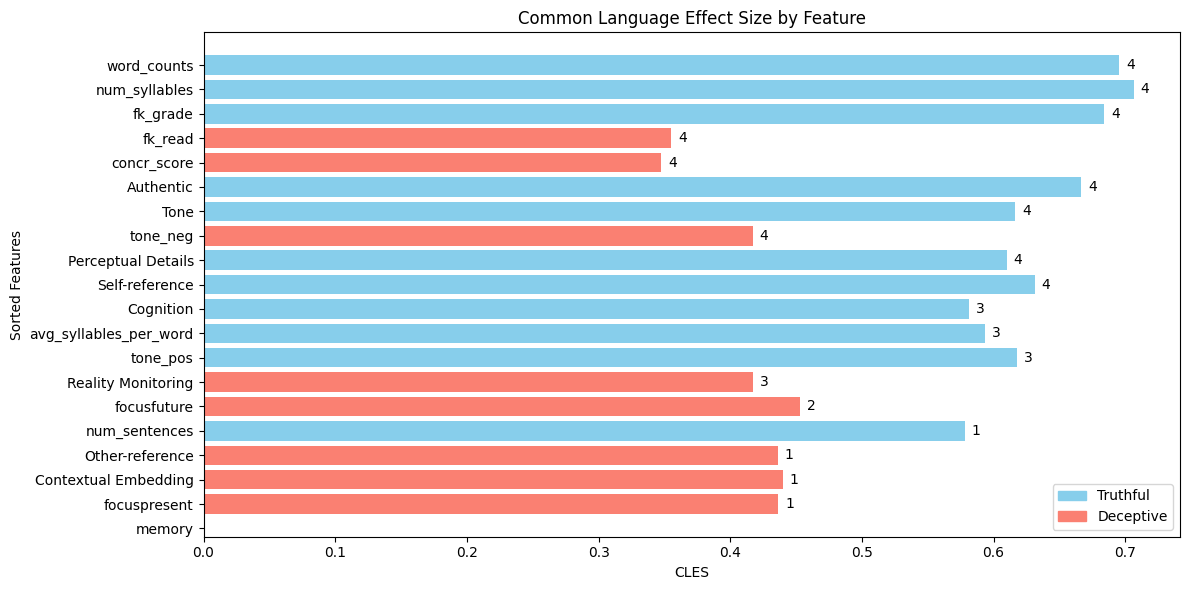

In [31]:
# Create a horizontal bar chart of effect size with an increased figure size
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size (width, height) as needed

# Define colors based on the stat value
colors = ['skyblue' if stat > 0 else 'salmon' for stat in perm_df_selected_stat.iloc[:,1:].mean(axis = 1)]

# Plot the bars
bars = ax.barh(perm_df_selected_cles['features'], perm_df_selected_cles['mean'], color=colors)

# Add legend
t_patch = plt.Rectangle((0, 0), 0, 0, color='skyblue', label='Truthful')
f_patch = plt.Rectangle((0, 0), 0, 0, color='salmon', label='Deceptive')
plt.legend(handles=[t_patch, f_patch], loc = 'lower right')

# Set labels
ax.set_xlabel('CLES')
ax.set_ylabel('Sorted Features')
ax.set_title('Common Language Effect Size by Feature')
ax.invert_yaxis()

# Add numerical values to the bars
perm_df_sign.reset_index(inplace = True)

for i, bar in enumerate(bars):
    count = perm_df_sign['Counts'][i]  # Get the count value for the current bar
    ax.annotate(str(count), xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

# Show the plot and adjust spacing
plt.tight_layout()
plt.show()